In [467]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import OneHotEncoder

import warnings
warnings.filterwarnings("ignore")

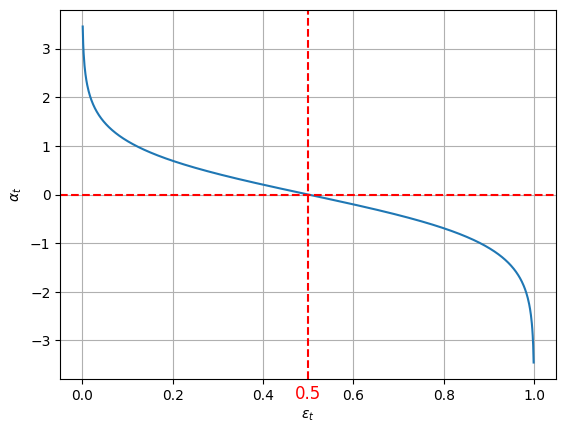

In [25]:
eps = np.arange(0, 1, 0.001)
alphas = 0.5*np.log((1 - eps)/eps)
plt.plot(eps, alphas)
plt.axhline(0, color='red', linestyle='--')  # Add y = 0 line
plt.axvline(0.5, color='red', linestyle='--')  # Add x = 0.5 line
plt.text(0.5, -4.2, '0.5', color='red', fontsize=12, ha='center')
plt.xlabel(r'$\epsilon_t$')
plt.ylabel(r'$\alpha_t$')
plt.grid(True)
plt.savefig('ada_boost_alpha_eps.png')
plt.show()

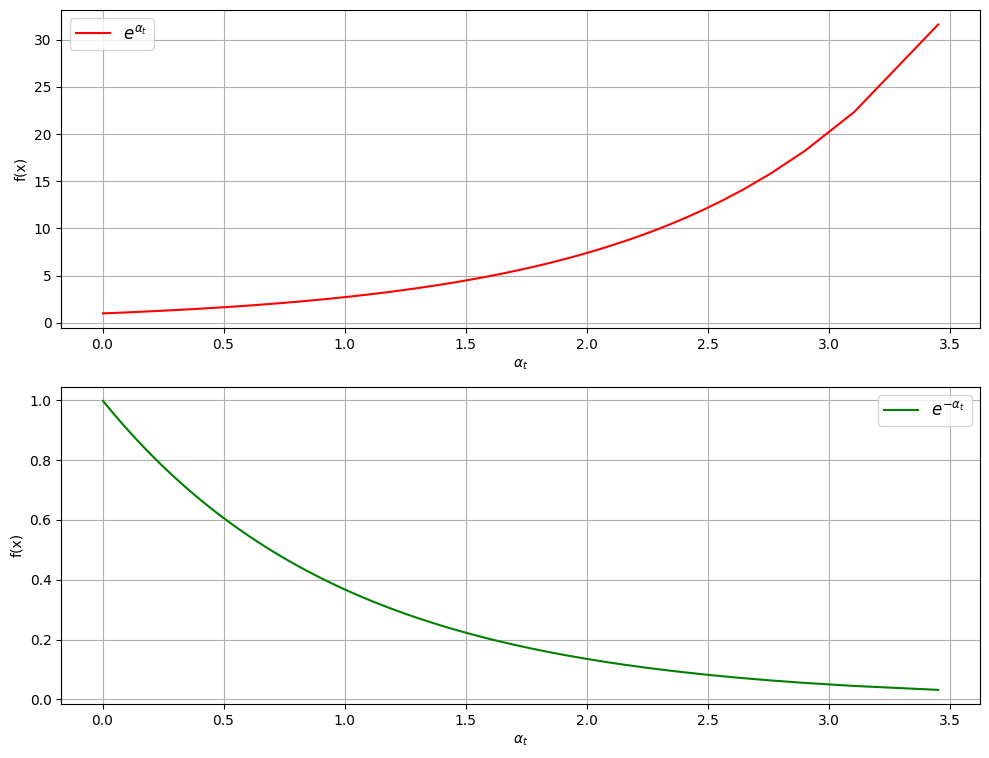

In [35]:
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(10, 8))
axes[0].plot(alphas[alphas > 0], np.exp(alphas[alphas > 0]), label = r'$e^{\alpha_t}$', color = "r")
axes[1].plot(alphas[alphas > 0], np.exp(-alphas[alphas > 0]), label = r'$e^{-\alpha_t}$', color="green")
axes[0].legend(fontsize='large')
axes[1].legend(fontsize='large')
axes[0].set_xlabel(r'$\alpha_t$')
axes[1].set_xlabel(r'$\alpha_t$')
axes[0].set_ylabel(r'f(x)')
axes[1].set_ylabel(r'f(x)')
axes[0].grid(True)
axes[1].grid(True)
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.savefig('ada_boost_weight_change_alpha.png')
plt.show()

In [1]:
# https://vincentarelbundock.github.io/Rdatasets/datasets.html

# 1.

Исследуйте зависимость тестовой ошибки от количества деревьев в ансамбле для
алгоритма adaboost.M1 на наборе данных Vehicle из пакета mlbench (обучающая выборка
должна состоять из 7/10 всех прецедентов, содержащихся в данном наборе данных). Постройте
график зависимости тестовой ошибки при числе деревьев, равном 1, 11, 21, . . . , 301, объясните
полученные результаты.

In [428]:
data = pd.read_csv('Vehicle.csv')
data.head()

,Comp,Circ,D.Circ,Rad.Ra,Pr.Axis.Ra,Max.L.Ra,Scat.Ra,Elong,Pr.Axis.Rect,Max.L.Rect,Sc.Var.Maxis,Sc.Var.maxis,Ra.Gyr,Skew.Maxis,Skew.maxis,Kurt.maxis,Kurt.Maxis,Holl.Ra,Class
0,95,48,83,178,72,10,162,42,20,159,176,379,184,70,6,16,187,197,van
1,91,41,84,141,57,9,149,45,19,143,170,330,158,72,9,14,189,199,van
2,104,50,106,209,66,10,207,32,23,158,223,635,220,73,14,9,188,196,saab
3,93,41,82,159,63,9,144,46,19,143,160,309,127,63,6,10,199,207,van
4,85,44,70,205,103,52,149,45,19,144,241,325,188,127,9,11,180,183,bus


In [429]:
for column in data:
    print(column, ": ", data[column].isnull().sum())

Comp :  0
Circ :  0
D.Circ :  0
Rad.Ra :  0
Pr.Axis.Ra :  0
Max.L.Ra :  0
Scat.Ra :  0
Elong :  0
Pr.Axis.Rect :  0
Max.L.Rect :  0
Sc.Var.Maxis :  0
Sc.Var.maxis :  0
Ra.Gyr :  0
Skew.Maxis :  0
Skew.maxis :  0
Kurt.maxis :  0
Kurt.Maxis :  0
Holl.Ra :  0
Class :  0


In [430]:
data['Class'].value_counts()

bus     218
saab    217
opel    212
van     199
Name: Class, dtype: int64

In [431]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
data['Class'] = le.fit_transform(data['Class'])
data.head()

,Comp,Circ,D.Circ,Rad.Ra,Pr.Axis.Ra,Max.L.Ra,Scat.Ra,Elong,Pr.Axis.Rect,Max.L.Rect,Sc.Var.Maxis,Sc.Var.maxis,Ra.Gyr,Skew.Maxis,Skew.maxis,Kurt.maxis,Kurt.Maxis,Holl.Ra,Class
0,95,48,83,178,72,10,162,42,20,159,176,379,184,70,6,16,187,197,3
1,91,41,84,141,57,9,149,45,19,143,170,330,158,72,9,14,189,199,3
2,104,50,106,209,66,10,207,32,23,158,223,635,220,73,14,9,188,196,2
3,93,41,82,159,63,9,144,46,19,143,160,309,127,63,6,10,199,207,3
4,85,44,70,205,103,52,149,45,19,144,241,325,188,127,9,11,180,183,0


In [432]:
data['Class'].value_counts()

0    218
2    217
1    212
3    199
Name: Class, dtype: int64

In [433]:
from sklearn.model_selection import train_test_split
X = data.drop("Class", axis=1)
y = data["Class"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state = 100, shuffle=True)

In [434]:
accuracies = []
estimators_num = [i for i in range(1, 311, 10)]
for estimator_num in estimators_num:
    clf = AdaBoostClassifier(n_estimators=estimator_num, random_state=0)
    clf.fit(X_train, y_train)
    accuracies.append(accuracy_score(y_test, clf.predict(X_test)))

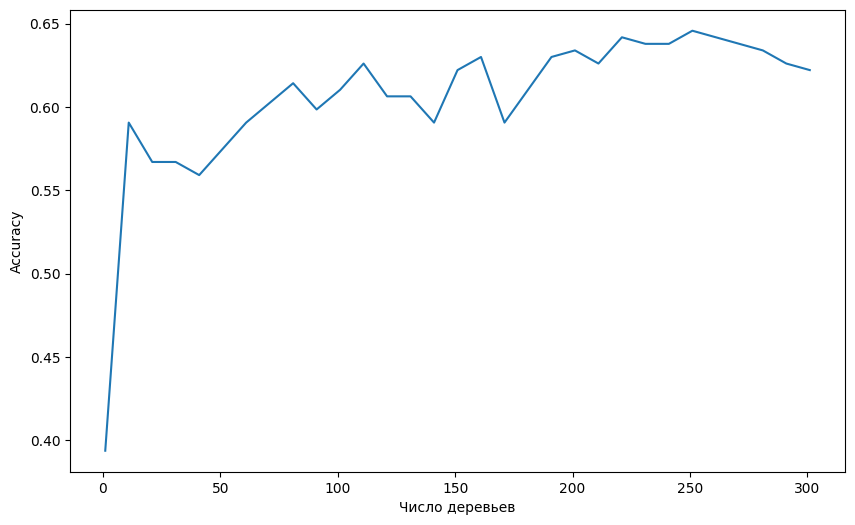

In [435]:
plt.figure(figsize=(10, 6))
plt.plot(estimators_num, accuracies)
plt.xlabel('Число деревьев')
plt.ylabel('Accuracy')
plt.savefig("ada_boost_nums.png")
plt.show()

# 2. 

Исследуйте зависимость тестовой ошибки от количества деревьев в ансамбле для
алгоритма bagging на наборе данных Glass из пакета mlbench (обучающая выборка должна
состоять из 7/10 всех прецедентов, содержащихся в данном наборе данных). Постройте график
зависимости тестовой ошибки при числе деревьев, равном 1, 11, 21, . . . , 201, объясните
полученные результаты

In [58]:
data = pd.read_csv('glass.csv')
data.head()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1


In [59]:
for column in data:
    print(column, ": ", data[column].isnull().sum())

RI :  0
Na :  0
Mg :  0
Al :  0
Si :  0
K :  0
Ca :  0
Ba :  0
Fe :  0
Type :  0


In [60]:
from sklearn.model_selection import train_test_split
X = data.drop("Type", axis=1)
y = data["Type"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state = 100, shuffle=True)

In [61]:
accuracies = []
estimators_num = [i for i in range(1, 211, 10)]
for estimator_num in estimators_num:
    clf = BaggingClassifier(n_estimators=estimator_num, random_state=100)
    clf.fit(X_train, y_train)
    accuracies.append(accuracy_score(y_test, clf.predict(X_test)))

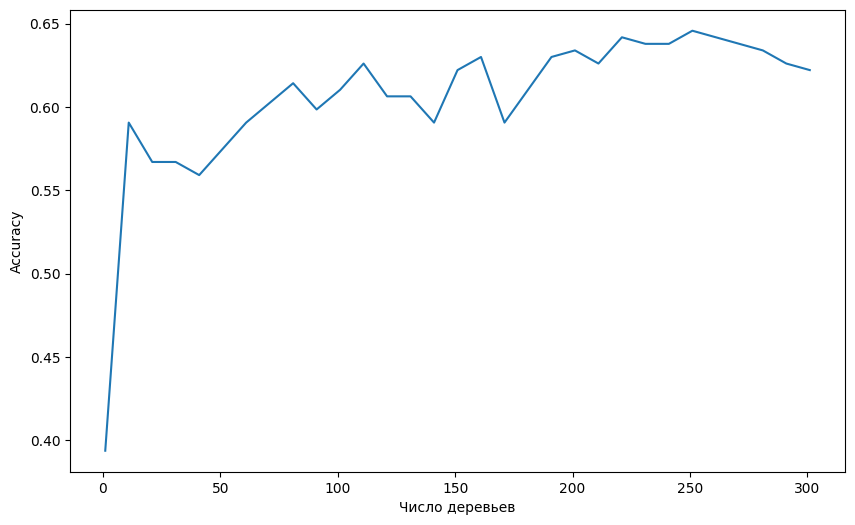

In [436]:
plt.figure(figsize=(10, 6))
plt.plot(estimators_num, accuracies)
plt.xlabel('Число деревьев')
plt.ylabel('Accuracy')
plt.savefig("bagging_nums.png")
plt.show()

# 3.

Реализуйте бустинг алгоритм с классификатором K ближайших соседей. Сравните
тестовую ошибку, полученную с использованием данного классификатора на наборах данных
Vehicle и Glass, c тестовой ошибкой, полученной с использованием единичного дерева
классификации. 

In [804]:
import numpy as np

class KNearestNeighbor:
    def __init__(self, k=5):
        self.k = k

    def fit(self, X, y, sample_weight = None):
        self.X_train = X
        self.y_train = y
        self.weights = sample_weight

    def predict(self, X):
        dists = self.compute_distances_no_loops(X)
        return self.predict_labels(dists, k=self.k)

    def compute_distances_no_loops(self, X):
        num_test = X.shape[0]
        num_train = self.X_train.shape[0]
        dists = np.zeros((num_test, num_train))

        dot_products = -2 * np.dot(X, self.X_train.T)
        sum_squares_test = np.sum(X ** 2, axis=1, keepdims=True)
        sum_squares_train = np.sum(self.X_train ** 2, axis=1)
        dists = np.sqrt(dot_products + sum_squares_test + sum_squares_train)
        return dists

    def predict_labels(self, dists, k=5):
        num_test = dists.shape[0]
        y_pred = np.zeros(num_test)

        for i in range(num_test):
            indices = np.argsort(dists[i])[:k]

            if self.weights is not None:
                closest_y = self.y_train[indices]
                y_pred[i] = np.argmax(np.bincount(closest_y, weights=self.weights[indices]))
            else:
                closest_y = self.y_train[indices]
                y_pred[i] = np.argmax(np.bincount(closest_y))

        return y_pred

In [805]:
class AdaBoostKNNClassifier:
    def __init__(self, estimator = None, n_estimators = 50, k = 5, max_depth = 1):
        self.estimator = estimator
        self.max_depth = max_depth
        self.k = k
        self.n_estimators = n_estimators
    
    def fit(self, X, y):
        X = X.to_numpy()
        y = y.to_numpy()
        self.n_classes = len(np.unique(y))
        self.weights = np.zeros((len(y), self.n_estimators + 1))
        self.weights[:, 0] = 1/len(y)
        self.estimators = {}
        self.alphas = {}
        for t in range(self.n_estimators):
            if self.estimator is DecisionTreeClassifier:
                self.estimators[t] = self.estimator(max_depth = self.max_depth)
            elif self.estimator is KNearestNeighbor:
                self.estimators[t] = self.estimator(k=self.k)
            self.estimators[t].fit(X, y, self.weights[:, t])
            predictions = self.estimators[t].predict(X)
            wrong_indexes = np.where(predictions != y)
            right_indexes = np.where(predictions == y)
            epsilon = np.sum(self.weights[wrong_indexes, t])
            self.alphas[t] = np.abs(0.1*np.log((1-epsilon + 1e-10)/(epsilon + 1e-10)))
            
            self.weights[wrong_indexes[0], t + 1] = self.weights[wrong_indexes[0], t] * np.exp(self.alphas[t])
            self.weights[right_indexes[0], t + 1] = self.weights[right_indexes[0], t] * np.exp(-self.alphas[t])
                
            self.weights[:, t + 1] /= np.sum(self.weights[:, t + 1])

    def predict(self, X):
        n_samples = len(X)
        
        class_scores = np.zeros((n_samples, self.n_classes))

        for t in range(self.n_estimators):

            predictions_t = self.estimators[t].predict(X)
            for c in range(self.n_classes):
                class_indexes = np.where(predictions_t == c)
                class_scores[:, c] += self.alphas[t] * (predictions_t == c)

        final_predictions = np.argmax(class_scores, axis=1)

        return final_predictions


In [806]:
data = pd.read_csv("Tic_tac_toe.txt", sep=",", header=None, names=[str(i) for i in range(1, 10)] + ["final"])
data.replace(value=2, to_replace="o", inplace=True)
data.replace(value=1, to_replace="x", inplace=True)
data.replace(value=0, to_replace="b", inplace=True)
data.replace(value=1, to_replace="positive", inplace=True)
data.replace(value=0, to_replace="negative", inplace=True)
X = data.drop("final", axis=1)
y = data["final"]
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state = 100, shuffle=True)
clf = AdaBoostKNNClassifier(k=1, n_estimators=10, estimator=KNearestNeighbor)
clf.fit(X_train, y_train)
print("KNNAdaBoost Accuracy Binary Tic Tac Toe: ", accuracy_score(y_test, clf.predict(X_test.to_numpy())))

KNNAdaBoost Accuracy Binary Tic Tac Toe:  0.7552083333333334


In [807]:
clf = KNearestNeighbor(k=5)
clf.fit(X_train.to_numpy(), y_train.to_numpy())
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)
y_pred = clf.predict(X_test.to_numpy())
print("KNNAdaBoost Accuracy Binary Tic Tac Toe: ", accuracy_score(y_test, clf.predict(X_test.to_numpy())))

X_train shape: (766, 9)
X_test shape: (192, 9)
y_train shape: (766,)
y_test shape: (192,)
KNNAdaBoost Accuracy Binary Tic Tac Toe:  0.875


In [808]:
data_v = pd.read_csv('Vehicle.csv')
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
data_v['Class'] = le.fit_transform(data_v['Class'])
print(data_v.head())
X = data_v.drop("Class", axis=1)
y = data_v["Class"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state = 100, shuffle=True)
clf = AdaBoostKNNClassifier(k=5, n_estimators=60, estimator=KNearestNeighbor)
clf.fit(X_train, y_train)

print("KNNAdaBoost Accuracy Vehicle: ", accuracy_score(y_test, clf.predict(X_test.to_numpy())))
clf = DecisionTreeClassifier(random_state=100)
clf.fit(X_train, y_train)
print("tree acc: ", accuracy_score(y_test, clf.predict(X_test)))

   Comp  Circ  D.Circ  Rad.Ra  Pr.Axis.Ra  Max.L.Ra  Scat.Ra  Elong  \
0    95    48      83     178          72        10      162     42   
1    91    41      84     141          57         9      149     45   
2   104    50     106     209          66        10      207     32   
3    93    41      82     159          63         9      144     46   
4    85    44      70     205         103        52      149     45   

   Pr.Axis.Rect  Max.L.Rect  Sc.Var.Maxis  Sc.Var.maxis  Ra.Gyr  Skew.Maxis  \
0            20         159           176           379     184          70   
1            19         143           170           330     158          72   
2            23         158           223           635     220          73   
3            19         143           160           309     127          63   
4            19         144           241           325     188         127   

   Skew.maxis  Kurt.maxis  Kurt.Maxis  Holl.Ra  Class  
0           6          16         187     

In [809]:
des_tree_acc_vehicle_test = []
des_tree_acc_vehicle_train = []
n_ests = [i for i in range(1, 60, 1)]
for i in n_ests:
    clf = AdaBoostKNNClassifier(n_estimators=i, estimator=DecisionTreeClassifier, max_depth = 1)
    clf.fit(X_train, y_train)
    acc_test = accuracy_score(y_test, clf.predict(X_test.to_numpy()))
    des_tree_acc_vehicle_test.append(acc_test)
    acc_train = accuracy_score(y_train, clf.predict(X_train.to_numpy()))
    des_tree_acc_vehicle_train.append(acc_train)
    #print(f"DesTreeAdaBoost Test Accuracy Vehicle with {i} estimators: ", accuracy_score(y_test, clf.predict(X_test.to_numpy())))
    #print(f"DesTreeAdaBoost Train Accuracy Vehicle with {i} estimators: ", accuracy_score(y_train, clf.predict(X_train.to_numpy())))
knn_acc_vehicle_train = []
knn_acc_vehicle_test = []
for i in n_ests:
    clf = AdaBoostKNNClassifier(k=6, n_estimators=i, estimator=KNearestNeighbor)
    clf.fit(X_train, y_train)
    acc_test = accuracy_score(y_test, clf.predict(X_test.to_numpy()))
    knn_acc_vehicle_test.append(acc_test)
    acc_train = accuracy_score(y_train, clf.predict(X_train.to_numpy()))
    knn_acc_vehicle_train.append(acc_train)
    #print(f"KNNAdaBoost Test Accuracy Vehicle with {i} estimators: ", accuracy_score(y_test, clf.predict(X_test.to_numpy())))
    #print(f"KNNAdaBoost Train Accuracy Vehicle with {i} estimators: ", accuracy_score(y_train, clf.predict(X_train.to_numpy())))

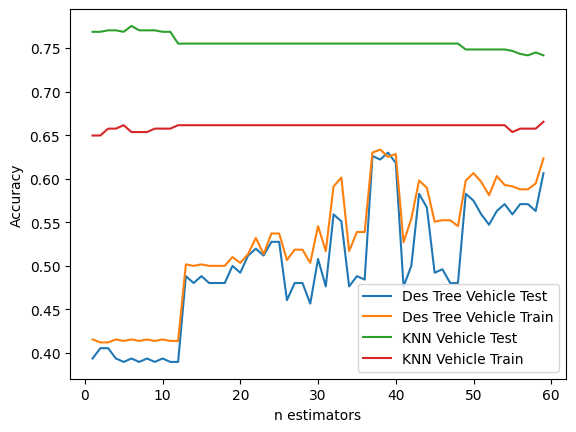

In [819]:
plt.plot(n_ests, des_tree_acc_vehicle_test, label = 'Des Tree Vehicle Test')
plt.plot(n_ests, des_tree_acc_vehicle_train, label = 'Des Tree Vehicle Train')
plt.plot(n_ests, knn_acc_vehicle_train, label = 'KNN Vehicle Test')
plt.plot(n_ests, knn_acc_vehicle_test, label = 'KNN Vehicle Train')
plt.legend()
plt.xlabel("n estimators")
plt.ylabel("Accuracy")
plt.savefig("n_est_acc_ada_vehicle.png")
plt.show()

In [811]:
accuracies_vehicle_train = []
accuracies_vehicle_test = []
n_ests = [i for i in range(1, 60, 1)]
for i in n_ests:
    clf = AdaBoostClassifier(n_estimators=i)
    clf.fit(X_train, y_train)
    accuracies_vehicle_test.append(accuracy_score(y_test, clf.predict(X_test)))
    accuracies_vehicle_train.append(accuracy_score(y_train, clf.predict(X_train)))

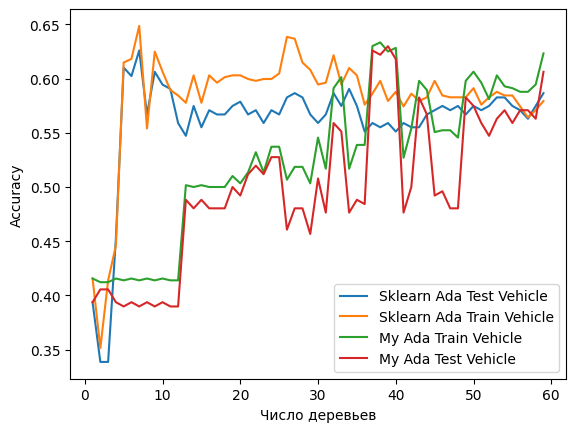

In [812]:
plt.plot(n_ests, accuracies_vehicle_test, label='Sklearn Ada Test Vehicle')
plt.plot(n_ests, accuracies_vehicle_train, label='Sklearn Ada Train Vehicle')
plt.plot(n_ests, des_tree_acc_vehicle_train, label='My Ada Train Vehicle')
plt.plot(n_ests, des_tree_acc_vehicle_test, label='My Ada Test Vehicle')
plt.xlabel('Число деревьев')
plt.ylabel('Accuracy')
plt.legend()
plt.savefig("dif_ada_boost_vehicle_nums.png")
plt.show()

In [813]:
data_g = pd.read_csv('glass.csv')
print(data_g.head())
X = data_g.drop("Type", axis=1)
y = data_g["Type"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state = 100, shuffle=True)
clf = AdaBoostKNNClassifier(k=1, n_estimators=60, estimator=KNearestNeighbor)
clf.fit(X_train, y_train)
print("KNNAdaBoost Accuracy Vehicle: ", accuracy_score(y_test, clf.predict(X_test.to_numpy())))
clf = DecisionTreeClassifier(random_state=100)
clf.fit(X_train, y_train)
print("tree acc: ", accuracy_score(y_test, clf.predict(X_test)))

        RI     Na    Mg    Al     Si     K    Ca   Ba   Fe  Type
0  1.52101  13.64  4.49  1.10  71.78  0.06  8.75  0.0  0.0     1
1  1.51761  13.89  3.60  1.36  72.73  0.48  7.83  0.0  0.0     1
2  1.51618  13.53  3.55  1.54  72.99  0.39  7.78  0.0  0.0     1
3  1.51766  13.21  3.69  1.29  72.61  0.57  8.22  0.0  0.0     1
4  1.51742  13.27  3.62  1.24  73.08  0.55  8.07  0.0  0.0     1
KNNAdaBoost Accuracy Vehicle:  0.5846153846153846
tree acc:  0.7538461538461538


In [814]:
des_tree_acc_glass_test = []
des_tree_acc_glass_train = []
n_ests = [i for i in range(1, 60, 1)]
for i in n_ests:
    clf = AdaBoostKNNClassifier(n_estimators=i, estimator=DecisionTreeClassifier, max_depth = 1)
    clf.fit(X_train, y_train)
    acc_test = accuracy_score(y_test, clf.predict(X_test.to_numpy()))
    des_tree_acc_glass_test.append(acc_test)
    acc_train = accuracy_score(y_train, clf.predict(X_train.to_numpy()))
    des_tree_acc_glass_train.append(acc_train)
    #print(f"DesTreeAdaBoost Test Accuracy Vehicle with {i} estimators: ", accuracy_score(y_test, clf.predict(X_test.to_numpy())))
    #print(f"DesTreeAdaBoost Train Accuracy Vehicle with {i} estimators: ", accuracy_score(y_train, clf.predict(X_train.to_numpy())))
knn_acc_glass_train = []
knn_acc_glass_test = []
for i in n_ests:
    clf = AdaBoostKNNClassifier(k=2, n_estimators=i, estimator=KNearestNeighbor)
    clf.fit(X_train, y_train)
    acc_test = accuracy_score(y_test, clf.predict(X_test.to_numpy()))
    knn_acc_glass_test.append(acc_test)
    acc_train = accuracy_score(y_train, clf.predict(X_train.to_numpy()))
    knn_acc_glass_train.append(acc_train)
    #print(f"KNNAdaBoost Test Accuracy Vehicle with {i} estimators: ", accuracy_score(y_test, clf.predict(X_test.to_numpy())))
    #print(f"KNNAdaBoost Train Accuracy Vehicle with {i} estimators: ", accuracy_score(y_train, clf.predict(X_train.to_numpy())))

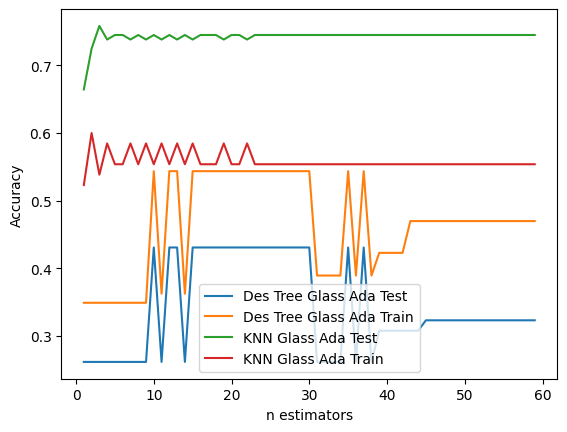

In [815]:
plt.plot(n_ests, des_tree_acc_glass_test, label = 'Des Tree Glass Ada Test')
plt.plot(n_ests, des_tree_acc_glass_train, label = 'Des Tree Glass Ada Train')
plt.plot(n_ests, knn_acc_glass_train, label = 'KNN Glass Ada Test')
plt.plot(n_ests, knn_acc_glass_test, label = 'KNN Glass Ada Train')
plt.legend()
plt.xlabel("n estimators")
plt.ylabel("Accuracy")
plt.savefig("n_est_acc_ada_glass.png")
plt.show()

In [816]:
accuracies_glass_train = []
accuracies_glass_test = []
n_ests = [i for i in range(1, 60, 1)]
for i in n_ests:
    clf = AdaBoostClassifier(n_estimators=i)
    clf.fit(X_train, y_train)
    accuracies_glass_test.append(accuracy_score(y_test, clf.predict(X_test)))
    accuracies_glass_train.append(accuracy_score(y_train, clf.predict(X_train)))

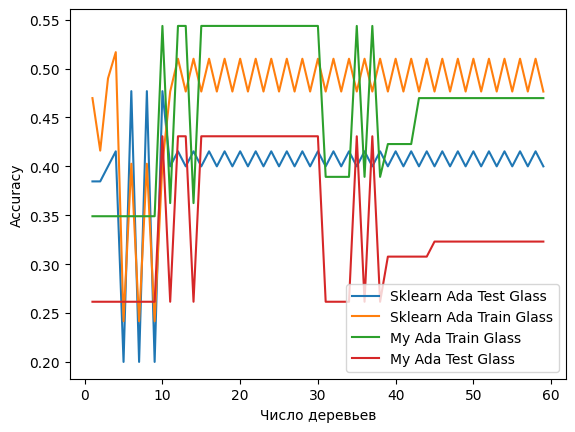

In [817]:
plt.plot(n_ests, accuracies_glass_test, label='Sklearn Ada Test Glass')
plt.plot(n_ests, accuracies_glass_train, label='Sklearn Ada Train Glass')
plt.plot(n_ests, des_tree_acc_glass_train, label='My Ada Train Glass')
plt.plot(n_ests, des_tree_acc_glass_test, label='My Ada Test Glass')
plt.xlabel('Число деревьев')
plt.ylabel('Accuracy')
plt.legend()
plt.savefig("dif_ada_boost_glass_nums.png")
plt.show()

In [818]:
print(max(accuracies_vehicle_test))
print(max(des_tree_acc_vehicle_test))
print(max(knn_acc_vehicle_test))
print(max(accuracies_glass_test))
print(max(des_tree_acc_glass_test))
print(max(knn_acc_glass_test))

0.6259842519685039
0.6299212598425197
0.6653543307086615
0.47692307692307695
0.4307692307692308
0.6
